# Prova 2- Entrega Final Mecânica de Sólidos e Fluídos

José Augusto de Almeida Neto

In [ ]:
from cProfile import label
from random import random, randint
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

###Caso 1 : Áreas das seções transversais como únicas variáveis

In [ ]:
class Individuo:

    def __init__(self, listaNumeros, listaForcas, listaLarguras, geracao=0):
        self.listaNumeros = listaNumeros
        self.listaForcas = listaForcas
        self.listaLarguras = listaLarguras
        self.nota_avaliacao = 0
        self.massa_total=0
        self.delta=0
        self.geracao = geracao
        self.cromossomo = []

        for i in range(len(self.listaNumeros)):
            a = randint(3, 5)
            self.cromossomo.append(a)

    def FuncaoDelta(self):
        listaL=list(self.listaLarguras)
        ListaF=list(self.listaForcas)
        listaA=list(self.cromossomo)

        #ângulos
        alfa = np.arctan(listaL[5]/listaL[0])
        beta = np.arctan(listaL[0]/listaL[5])
        gama = np.arctan(listaL[1]/listaL[5])
        
        if (listaL[7] > listaL[5] and listaL[7] > listaL[9]) or (listaL[9] > listaL[7] and listaL[7] > listaL[5]) or (listaL[5] < listaL[7] and listaL[7] == listaL[9]): 
            #padrão ou rampa2 ou rampa5
            teta = np.arctan((listaL[7] - listaL[5])/listaL[1])
            psi = np.arctan(listaL[1]/(listaL[7] - listaL[5]))
        elif (listaL[5] > listaL[7] and listaL[7] > listaL[9]) or (listaL[5] > listaL[7] and listaL[9] > listaL[7]) or (listaL[5] > listaL[7] and listaL[7] == listaL[9]): 
            #rampa1 ou M ou rampa 4
            teta = np.arctan(listaL[1]/(listaL[5] - listaL[7]))
            psi = np.arctan((listaL[5] - listaL[7])/listaL[1])
        elif (listaL[7] == listaL[5] and listaL[7] == listaL[9]) or (listaL[5] == listaL[7] and listaL[5] > listaL[9]) or (listaL[5] == listaL[7] and listaL[5] < listaL[9]): 
            #3 alturas iguais ou rampa3 ou rampa6
            teta = 0
            psi = 0
        
        if (listaL[7] > listaL[5] and listaL[7] > listaL[9]) or (listaL[5] > listaL[7] and listaL[7] > listaL[9]) or (listaL[5] == listaL[7] and listaL[5] > listaL[9]): 
            #padrão ou rampa1 ou rampa3
            lambd = np.arctan(listaL[2]/(listaL[7] - listaL[9]))
            ro = np.arctan((listaL[7] - listaL[9])/listaL[2])
        elif (listaL[9] > listaL[7] and listaL[7] > listaL[5]) or (listaL[5] > listaL[7] and listaL[9] > listaL[7]) or (listaL[5] == listaL[7] and listaL[5] < listaL[9]): 
            #rampa2 ou M ou rampa6
            lambd = np.arctan((listaL[9] - listaL[7])/listaL[2])
            ro = np.arctan((listaL[2])/(listaL[9] - listaL[7]))
        elif (listaL[7] == listaL[5] and listaL[7] == listaL[9]) or (listaL[5] > listaL[7] and listaL[7] == listaL[9]) or (listaL[5] < listaL[7] and listaL[7] == listaL[9]): 
            #3 alturas iguais ou rampa4 ou rampa5
            lambd = 0
            ro = 0
          
        omega = np.arctan(listaL[5]/listaL[1])
        fi = np.arctan(listaL[1]/listaL[5])
        delt = np.arctan(listaL[2]/listaL[9])
        mi = np.arctan(listaL[9]/listaL[2])

        sigma = np.arctan(listaL[9]/listaL[3])
        pi = np.arctan((listaL[2])/listaL[9])

        #reação horizontal em A
        rAx = (listaF[5] + listaF[6] + listaF[7] + listaF[8] + listaF[9]) * (-1)

        #reação vertical em E
        rEy = ((listaF[1] * listaL[0]) + (listaF[6] * listaL[5]) + (listaF[2] * (listaL[0] + listaL[1])) + (listaF[7] * listaL[7]) + 
              (listaF[3] * (listaL[0] + listaL[1] + listaL[2])) + (listaF[8] * listaL[9]) + (listaF[4] * (listaL[0] + listaL[1] + listaL[2] + listaL[3]))) / (listaL[0] + listaL[1] + listaL[2] + listaL[3])
        
        #reação vertical em A
        rAy = listaF[0] + listaF[1] + listaF[2] + listaF[3] + listaF[4] - rEy

        #Carga virtual unitária no ponto C
        fnC = 1
        #reação horizontal virtual em A
        rnAx = 0
        #reação vertical virtual em E
        rnEy = fnC*((listaL[0] + listaL[1])/(listaL[0] + listaL[1] + listaL[2] + listaL[3]))
        #reação vertical virtual em A
        rnAy = fnC - rnEy

        #Módulo de Elasticidade do aço (kN/m^2)
        mE = 2*((10)**(8))
        
        #cálculo das forças axiais nas barras (forças internas N) e das forças virtuais nas barras (forças internas n)
        fN5 = (listaF[0] - rAy)/np.sin(alfa)
        fn5 = (-rnAy)/(np.sin(alfa))

        fN1 = rAx * (-1) - fN5*np.cos(alfa) - listaF[5]
        fn1 = -rnAx -fn5*np.cos(alfa)

        fN2 = fN1
        fn2 = fn1

        fN6 = 0
        fn6 = 0 

        if (listaL[7] > listaL[5] and listaL[7] > listaL[9]) or (listaL[9] > listaL[7] and listaL[7] > listaL[5]) or (listaL[5] < listaL[7] and listaL[7] == listaL[9]): 
            #padrão ou rampa2 ou rampa5
            fN7 = -(listaF[1] * np.cos(teta) + listaF[6] * np.sin(teta) + fN6 * np.cos(teta) + fN5 * np.cos(teta) 
            * np.cos(beta) - fN5 * np.sin(beta) * np.sin(teta)) / (np.cos(gama) * np.cos(teta) + np.sin(gama) * np.sin(teta))
            fn7 = -((np.cos(beta)*np.cos(teta)*fn5 + np.cos(teta)*fn6 - fn5*np.sin(beta)*np.sin(teta))
            /(np.cos(gama)*np.cos(teta) + np.sin(gama)*np.sin(teta)))
            fN12 = (fN7*np.cos(gama) + fN5*np.cos(beta) + fN6 + listaF[1])/(np.sin(teta))
            fn12 = (fn7*np.cos(gama) + fn5*np.cos(beta) + fn6)/(np.sin(teta))

        elif (listaL[5] > listaL[7] and listaL[7] > listaL[9]) or (listaL[5] > listaL[7] and listaL[9] > listaL[7]) or (listaL[5] > listaL[7] and listaL[7] == listaL[9]): 
            #rampa1 ou M ou rampa 4
            fN7 = ((listaF[1] + fN5*np.cos(beta) + fN6)*np.sin(teta)  + fN5 * np.sin(beta) * np.cos(teta))/(np.sin(teta) * np.cos(gama) - np.cos(teta) * np.sin(gama))
            fn7 = ((fn5*np.cos(beta) + fn6)*np.sin(teta)  + fn5 * np.sin(beta) * np.cos(teta))/(np.sin(teta) * np.cos(gama) - np.cos(teta) * np.sin(gama))
            fN12 = (fN5*np.sin(beta) - fN7*np.sin(gama))/(np.sin(teta))
            fn12 = (fn5*np.sin(beta) - fn7*np.sin(gama))/(np.sin(teta))

        elif (listaL[7] == listaL[5] and listaL[7] == listaL[9]) or (listaL[5] == listaL[7] and listaL[5] > listaL[9]) or (listaL[5] == listaL[7] and listaL[5] < listaL[9]): 
            #3 alturas iguais ou rampa3 ou rampa6
            fN7 = -(fN5 * np.cos(beta) + fN6 + listaF[1]) / np.cos(gama)
            fn7 = -(fn5 * np.cos(beta) + fn6) / np.cos(gama)
            fN12 =  fN5*np.sin(beta) - fN7*np.sin(gama) - listaF[6]
            fn12 =  fn5*np.sin(beta) - fn7*np.sin(gama)


        if listaL[7] > listaL[5] and listaL[7] > listaL[9]: 
            #padrão
            fN13 = (fN12*np.sin(psi) - listaF[7])/np.sin(lambd)
            fn13 = (fn12*np.sin(psi))/np.sin(lambd) 
            fN8 = - fN12*np.cos(psi) - fN13*np.cos(lambd) - listaF[2]
            fn8 = - fn12*np.cos(psi) - fn13*np.cos(lambd)
        elif listaL[5] > listaL[7] and listaL[7] > listaL[9]: 
            #rampa1
            fN13 = (fN12*np.cos(psi) - listaF[7])/np.sin(lambd)
            fn13 = (fn12*np.cos(psi))/np.sin(lambd)
            fN8 = fN12*np.sin(psi) - fN13*np.cos(lambd) - listaF[2]
            fn8 = fn12*np.sin(psi) - fn13*np.cos(lambd)
        elif listaL[9] > listaL[7] and listaL[7] > listaL[5]: 
            #rampa2
            fN13 = (fN12*np.sin(psi) - listaF[7])/np.cos(lambd)
            fn13 = (fn12*np.sin(psi))/np.cos(lambd)
            fN8 = fN13*np.sin(lambd) - fN12*np.cos(psi) - listaF[2]
            fn8 = fn13*np.sin(lambd) - fn12*np.cos(psi)
        elif listaL[5] > listaL[7] and listaL[9] > listaL[7]: 
            #M
            fN13 = (fN12*np.cos(psi) - listaF[7])/np.cos(lambd)
            fn13 = (fn12*np.cos(psi))/np.cos(lambd)
            fN8 = fN12*np.sin(psi) + fN13*np.sin(lambd) - listaF[2]
            fn8 = fn12*np.sin(psi) + fn13*np.sin(lambd)
        elif listaL[7] == listaL[5] and listaL[7] == listaL[9]: 
            #3 alturas iguais
            fN13 = fN12 - listaF[7]
            fn13 = fn12
            fN8 = - listaF[2]
            fn8 = 0
        elif listaL[5] == listaL[7] and listaL[5] > listaL[9]: 
            #rampa3
            fN13 = (fN12 - listaF[7])/np.sin(lambd)
            fn13 = fn12/np.sin(lambd)
            fN8 = - fN13*np.cos(lambd) - listaF[2]
            fn8 = - fn13*np.cos(lambd)
        elif listaL[5] > listaL[7] and listaL[7] == listaL[9]: 
            #rampa4
            fN13 = fN12*np.cos(psi) - listaF[7]
            fn13 = fn12*np.cos(psi)
            fN8 = fN12*np.sin(psi) - listaF[2]
            fn8 = fn12*np.sin(psi)
        elif listaL[5] < listaL[7] and listaL[7] == listaL[9]: 
            #rampa5
            fN13 = fN12*np.sin(psi) - listaF[7]
            fn13 = fn12*np.sin(psi)
            fN8 = - fN12*np.cos(psi) - listaF[2]
            fn8 = - fn12*np.cos(psi)
        elif listaL[5] == listaL[7] and listaL[5] < listaL[9]: 
            #rampa6
            fN13 = (fN12 - listaF[7])/np.cos(lambd)
            fn13 = fn12/np.cos(lambd)
            fN8 = fN13*np.sin(lambd) - listaF[2]
            fn8 = fn13*np.sin(lambd)
            
        fN9 = (-fN7*np.cos(fi) - fN8)/np.cos(delt)
        fn9 = (-fn7*np.cos(fi) - fn8 + fnC)/np.cos(delt)

        fN3 = fN2 + fN7*np.cos(omega) - fN9*np.cos(mi)
        fn3 = fn2 + fn7*np.cos(omega) - fn9*np.cos(mi)

        fN4 = fN3
        fn4 = fn3

        fN10 = 0
        fn10 = 0
        
        if (listaL[7] > listaL[5] and listaL[7] > listaL[9]) or (listaL[5] > listaL[7] and listaL[7] > listaL[9]) or (listaL[5] == listaL[7] and listaL[5] > listaL[9]): 
            #padrão ou rampa1 ou rampa3
            fN11 = (fN13*np.cos(ro) + fN9*np.sin(pi) - listaF[8])/np.cos(sigma)
            fn11 = (fn13*np.cos(ro) + fn9*np.sin(pi))/np.cos(sigma)
        elif (listaL[9] > listaL[7] and listaL[7] > listaL[5]) or (listaL[5] > listaL[7] and listaL[9] > listaL[7]) or (listaL[5] == listaL[7] and listaL[5] < listaL[9]): 
            #rampa2 ou M ou rampa6
            fN11 = (fN13*np.sin(ro) + fN9*np.sin(pi) - listaF[8])/np.cos(sigma)
            fn11 = (fn13*np.sin(ro) + fn9*np.sin(pi))/np.cos(sigma)
        elif (listaL[7] == listaL[5] and listaL[7] == listaL[9]) or (listaL[5] > listaL[7] and listaL[7] == listaL[9]) or (listaL[5] < listaL[7] and listaL[7] == listaL[9]): 
            #3 alturas iguais ou rampa4 ou rampa5
            fN11 = (fN13 + fN9*np.sin(pi) - listaF[8])/np.cos(sigma)
            fn11 = (fn13 + fn9*np.sin(pi))/np.cos(sigma)
        
        #lista das forças internas N
        listafN = [fN1, fN2, fN3, fN4, fN5, fN6, fN7, fN8, fN9, fN10, fN11, fN12, fN13]

        #lista das forças virtuais n    
        listafn = [fn1, fn2, fn3, fn4, fn5, fn6, fn7, fn8, fn9, fn10, fn11, fn12, fn13]

        #construção lista Delta
        listaDelta = []
        for j in range(len(listaL)):
            delta = ((listaL[j]*listafN[j]*listafn[j])/(mE*listaA[j]*((10)**(-4)))) * 1000
            listaDelta.append(delta)
            
        d = sum(listaDelta)

        self.delta=d

        return self.delta


    def calcula_massaTotal(self):
        massa = 0
        for i in range(len(self.cromossomo)):
            
            massa += 7870 * self.cromossomo[i]*(((10))**(-4)) * self.listaLarguras[i]

        self.massa_total = massa
        return massa 

    def avaliar(self):
        total = self.calcula_massaTotal()
        nota = 0
        d = self.FuncaoDelta()
        nota = 1 / (0.1 * total + d)

        self.nota_avaliacao = nota

    def crossover(self, outro_individuo):
        corte = round(random() * len(self.cromossomo))

        filho1 = outro_individuo.cromossomo[0:corte] + self.cromossomo[corte::]
        filho2 = self.cromossomo[0:corte] + outro_individuo.cromossomo[corte::]

        filhos = [Individuo(self.listaNumeros, self.listaForcas, self.listaLarguras, self.geracao + 1),
                  Individuo(self.listaNumeros, self.listaForcas, self.listaLarguras, self.geracao + 1)]
        filhos[0].cromossomo = filho1
        filhos[1].cromossomo = filho2

        return filhos
    
    def mutacao(self, taxa_mutacao):
        for i in range(len(self.cromossomo)):
            if random() < taxa_mutacao:
                self.cromossomo[i] = randint(3, 5)
                
        return self
    

In [ ]:
#Caso 1
class AG:

    def __init__(self, tamanho_populacao):
        self.tamanho_populacao = tamanho_populacao
        self.populacao = []
        self.geracao = 0
        self.melhor_solucao = 0
        self.lista_solucoes = []

    def inicializa_populacao(self, lista1, lista2, lista3):
        for i in range(self.tamanho_populacao):
            self.populacao.append(Individuo(lista1, lista2, lista3))
        self.melhor_solucao = self.populacao[0]

    def ordena_populacao(self):
        self.populacao = sorted(self.populacao,
                                key=lambda populacao: populacao.nota_avaliacao,
                                reverse=True)

    def melhor_individuo(self, individuo):  # vai armazenar o melhor individuo de todas as gerações
        if individuo.nota_avaliacao > self.melhor_solucao.nota_avaliacao:
            self.melhor_solucao = individuo

    def soma_avaliacoes(self):
        soma = 0
        for individuo in self.populacao:
            soma += individuo.nota_avaliacao
        return soma

    def seleciona_pai(self, soma_avaliacao):
        pai = -1
        valor_sorteado = random() * soma_avaliacao
        soma = 0
        i = 0
        while i < len(self.populacao) and soma < valor_sorteado:
            soma += self.populacao[i].nota_avaliacao
            pai += 1
            i += 1
        return pai

    def plotar(self,nome):
        l = self.melhor_solucao.listaLarguras
        c = self.melhor_solucao.cromossomo
        def colorbarra(self,index):
            if self.melhor_solucao.cromossomo[index] == 3:
                return '#00BCF9'
            elif self.melhor_solucao.cromossomo[index] == 4:
                return '#00E813'
            elif self.melhor_solucao.cromossomo[index] == 5:
                return '#EC0015'        

        #cordenadas das barras
        with plt.style.context('fivethirtyeight'):
            plt.title('Treliça Geração: {}'.format(self.geracao))
            
            plt.axis([-0.5,8,-0.5,8])
            blue_line = mlines.Line2D([], [], color='#00BCF9', label='A1 = 3x10^-4 m²')
            red_line = mlines.Line2D([], [], color='#EC0015', label='A3 = 5x10^-4 m²')
            green_line = mlines.Line2D([], [], color='#00E813', label='A2 = 4x10^-4 m²')
            plt.legend(handles=[blue_line,green_line,red_line,])
            
            plt.text(0,5.7,'Delta:{:.3f} mm'.format(self.melhor_solucao.delta))
            plt.text(0,6.5,'Massa Total:{:.3f} Kg'.format(self.melhor_solucao.massa_total))
            plt.text(0,7.3,'Função Objetivo:{:.3f}'.format(self.melhor_solucao.nota_avaliacao))


            plt.grid(color = 'w')
            plt.plot ((0,l[0] ), (0, 0),color=colorbarra(self,0),linewidth = 2)                       #barra 1
            plt.plot ((l[0],l[0]+l[1] ), (0, 0),color=colorbarra(self,1),linewidth = 2)              
            plt.plot ((l[1],l[0]+l[1]+l[2] ), (0, 0),color=colorbarra(self,2),linewidth = 2)
            plt.plot ((l[2],l[0]+l[1]+l[2]+l[3] ), (0, 0),color=colorbarra(self,3),linewidth = 2)
            plt.plot ((0,l[0]), (0,l[5]),color=colorbarra(self,4),linewidth = 2)
            plt.plot ((l[0],l[0] ), (0, l[5]),color=colorbarra(self,5),linewidth = 2)
            plt.plot ((l[0],l[0]+l[1] ), (l[5], 0),color=colorbarra(self,6),linewidth = 2)
            plt.plot ((l[0]+l[1],l[0]+l[1] ), (0, l[7]),color=colorbarra(self,7),linewidth = 2)
            plt.plot ((l[0]+l[1],l[0]+l[1]+l[2] ), (0, l[9]),color=colorbarra(self,8),linewidth = 2)
            plt.plot ((l[0]+l[1]+l[2],l[0]+l[1]+l[2] ), (0, l[9]),color=colorbarra(self,9),linewidth = 2)
            plt.plot ((l[0]+l[1]+l[2],l[0]+l[1]+l[2]+l[3] ), (l[9], 0),color=colorbarra(self,10),linewidth = 2)
            plt.plot ((l[0],l[0]+l[1] ), (l[5], l[7]),color=colorbarra(self,11),linewidth = 2)
            plt.plot ((l[0]+l[1],l[0]+l[1]+l[2] ), (l[7], l[9]),color=colorbarra(self,12),linewidth = 2)
            plt.savefig(f'{nome}')
            plt.close()


    def resolver(self, taxa_mutacao, num_geracoes, lista1, lista2, lista3):
        self.inicializa_populacao(lista1, lista2, lista3)

        for individuo in self.populacao:
            individuo.avaliar()

        self.ordena_populacao()
        self.melhor_solucao = self.populacao[0]
        self.lista_solucoes.append(self.melhor_solucao.nota_avaliacao)

        for geracao in range(1, num_geracoes + 1):
            soma_avaliacao = self.soma_avaliacoes()  # necessário para selecionar os pais
            self.geracao += 1
            nova_populacao = []

            for individuos_gerados in range(0, self.tamanho_populacao - 1, 2):  # pegar indivíduos a cada 2
                pai1 = self.seleciona_pai(soma_avaliacao)
                pai2 = self.seleciona_pai(soma_avaliacao)

                filhos = self.populacao[pai1].crossover(self.populacao[pai2])
                nova_populacao.append(filhos[0].mutacao(taxa_mutacao))
                nova_populacao.append(filhos[1].mutacao(taxa_mutacao))
                for filho in filhos:
                    filho.geracao = geracao

            nova_populacao.append(self.populacao[0])
            self.populacao = list(nova_populacao)  # substitui-se a antiga população
            for individuo in self.populacao:
                individuo.avaliar()

            self.ordena_populacao()
            melhor = self.populacao[0]
            self.lista_solucoes.append(melhor.nota_avaliacao)
            self.melhor_individuo(melhor)
            self.plotar(geracao)
  
        print('\nMelhor solução\n-G: %s \nMassa Total: %s  \nDelta: %s  \nFuncao Objetivo: %s  \nCromossomo: %s' %
              (self.melhor_solucao.geracao,
               self.melhor_solucao.massa_total,
               self.melhor_solucao.delta,
               self.melhor_solucao.nota_avaliacao,
               self.melhor_solucao.cromossomo))
        
        return self.melhor_solucao.cromossomo

In [ ]:
# Tamanho das barras (m)
l1 = l2 = l3 = l4 = 2
l8 = 3
l6 = 2
l10 = 2
l5 = l7 = (((l1)**2 + (l6)**2))**(1/2)
l9 = l11 = (((l4)**2 + (l10)**2))**(1/2)
l12 = (((l2)**2 + (l8 - l6)**2))**(1/2)
l13 = (((l3)**2 + (l8 - l10)**2))**(1/2)
# Forças aplicadas (kN)

f1 =0
f2 = 55
f3 = 20
f4 = 40
f5 = 10
f6=f7=f8=f9=f10=0

# Formação das listas
listaNum = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

listaL = [l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13]
listaF = [f1, f2, f3, f4, f5,f6,f7,f8,f9,f10]

tam = 20
taxa_mutacao = 0.05
num_geracoes = 200
ag = AG(tam)

ag.resolver(taxa_mutacao, num_geracoes, listaNum, listaF, listaL)
plt.plot(ag.lista_solucoes)
plt.title('Acompanhamento dos valores')
plt.show()

Melhor Solução

Geração: 54

Massa Total: 94.92440933772737

Delta: 8.245238409257103

Funcao Objetivo: 0.05637716076950945

Cromossomo: [4, 4, 4, 4, 5, 3, 3, 3, 3, 3, 5, 5, 5]

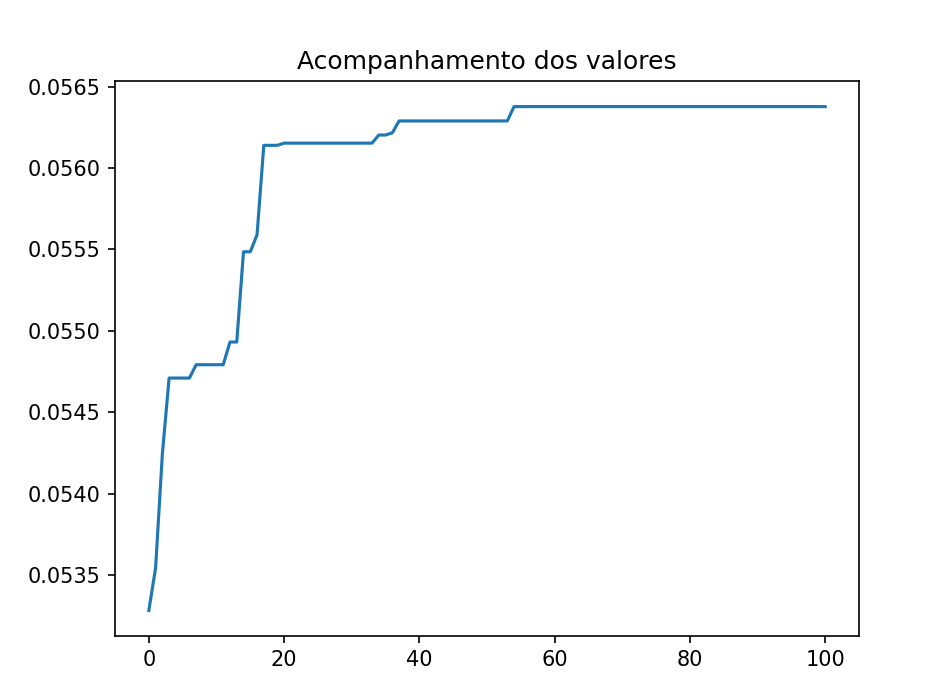

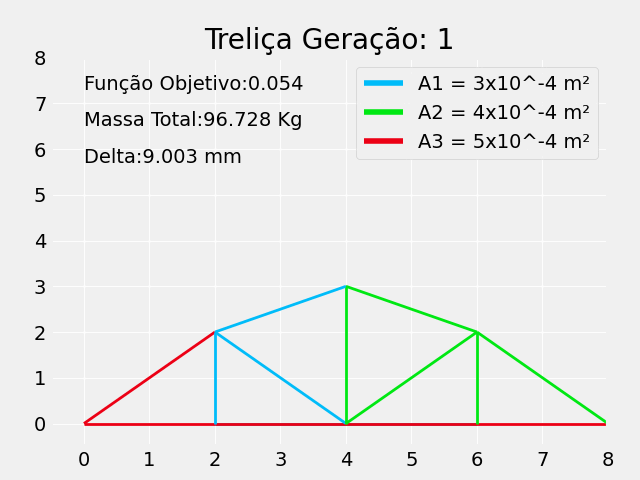

###Caso 2 - Áreas das seções transversais e alturas de l6, l8 e l10 como variáveis

In [ ]:
class Individuo:

    def __init__(self, listaNumeros, listaForcas, geracao=0):
        self.listaNumeros = listaNumeros
        self.listaForcas = listaForcas
        self.nota_avaliacao = 0
        self.massa_total = 0
        self.delta = 0
        self.geracao = geracao

        self.cromossomo = None
        self.forcainterna = None
        self.forcavirtual = None

        self.cromossomoArea = []
        self.cromossomoLargura = [2, 2, 2, 2, 0, None, 0, None, 0, None, 0, 0, 0]

        for i in range(len(self.listaNumeros)):
            a = randint(3, 5)
            self.cromossomoArea.append(a)
            if self.cromossomoLargura[i] == None:
                b = randint(1, 3)
                self.cromossomoLargura[i] = b

        for i in range(len(self.cromossomoLargura)):
            if i == 4 or i == 6:
                self.cromossomoLargura[i] = (
                        ((((self.cromossomoLargura[0]) ** 2) + (self.cromossomoLargura[5]) ** 2)) ** (1 / 2))
            if i == 8 or i == 10:
                self.cromossomoLargura[i] = (
                        ((((self.cromossomoLargura[3]) ** 2) + (self.cromossomoLargura[9]) ** 2)) ** (1 / 2))
            if i == 11:
                self.cromossomoLargura[i] = (((((self.cromossomoLargura[1]) ** 2) + (
                        self.cromossomoLargura[7] - self.cromossomoLargura[5]) ** 2)) ** (1 / 2))
            if i == 12:
                self.cromossomoLargura[i] = (((((self.cromossomoLargura[2]) ** 2) + (
                        self.cromossomoLargura[7] - self.cromossomoLargura[9]) ** 2)) ** (1 / 2))

    def FuncaoDelta(self):
        listaL = list(self.cromossomoLargura)
        listaF = list(self.listaForcas)
        listaA = list(self.cromossomoArea)
        # ângulos
        alfa = np.arctan(listaL[5] / listaL[0])
        beta = np.arctan(listaL[0] / listaL[5])
        gama = np.arctan(listaL[1] / listaL[5])

        if (listaL[7] > listaL[5] and listaL[7] > listaL[9]) or (listaL[9] > listaL[7] and listaL[7] > listaL[5]) or (
                listaL[5] < listaL[7] and listaL[7] == listaL[9]):
            # padrão ou rampa2 ou rampa5
            teta = np.arctan((listaL[7] - listaL[5]) / listaL[1])
            psi = np.arctan(listaL[1] / (listaL[7] - listaL[5]))
        elif (listaL[5] > listaL[7] and listaL[7] > listaL[9]) or (listaL[5] > listaL[7] and listaL[9] > listaL[7]) or (
                listaL[5] > listaL[7] and listaL[7] == listaL[9]):
            # rampa1 ou M ou rampa 4
            teta = np.arctan(listaL[1] / (listaL[5] - listaL[7]))
            psi = np.arctan((listaL[5] - listaL[7]) / listaL[1])
        elif (listaL[7] == listaL[5] and listaL[7] == listaL[9]) or (
                listaL[5] == listaL[7] and listaL[5] > listaL[9]) or (listaL[5] == listaL[7] and listaL[5] < listaL[9]):
            # 3 alturas iguais ou rampa3 ou rampa6
            teta = 0
            psi = 0

        if (listaL[7] > listaL[5] and listaL[7] > listaL[9]) or (listaL[5] > listaL[7] and listaL[7] > listaL[9]) or (
                listaL[5] == listaL[7] and listaL[5] > listaL[9]):
            # padrão ou rampa1 ou rampa3
            lambd = np.arctan(listaL[2] / (listaL[7] - listaL[9]))
            ro = np.arctan((listaL[7] - listaL[9]) / listaL[2])
        elif (listaL[9] > listaL[7] and listaL[7] > listaL[5]) or (listaL[5] > listaL[7] and listaL[9] > listaL[7]) or (
                listaL[5] == listaL[7] and listaL[5] < listaL[9]):
            # rampa2 ou M ou rampa6
            lambd = np.arctan((listaL[9] - listaL[7]) / listaL[2])
            ro = np.arctan((listaL[2]) / (listaL[9] - listaL[7]))
        elif (listaL[7] == listaL[5] and listaL[7] == listaL[9]) or (
                listaL[5] > listaL[7] and listaL[7] == listaL[9]) or (listaL[5] < listaL[7] and listaL[7] == listaL[9]):
            # 3 alturas iguais ou rampa4 ou rampa5
            lambd = 0
            ro = 0

        omega = np.arctan(listaL[5] / listaL[1])
        fi = np.arctan(listaL[1] / listaL[5])
        delt = np.arctan(listaL[2] / listaL[9])
        mi = np.arctan(listaL[9] / listaL[2])

        sigma = np.arctan(listaL[9] / listaL[3])
        pi = np.arctan((listaL[2]) / listaL[9])

        # reação horizontal em A
        rAx = (listaF[5] + listaF[6] + listaF[7] + listaF[8] + listaF[9]) * (-1)

        # reação vertical em E
        rEy = ((listaF[1] * listaL[0]) + (listaF[6] * listaL[5]) + (listaF[2] * (listaL[0] + listaL[1])) + (
                listaF[7] * listaL[7]) + (listaF[3] * (listaL[0] + listaL[1] + listaL[2])) + (
                       listaF[8] * listaL[9]) + (listaF[4] * (listaL[0] + listaL[1] + listaL[2] + listaL[3]))) / (
                      listaL[0] + listaL[1] + listaL[2] + listaL[3])

        # reação vertical em A
        rAy = listaF[0] + listaF[1] + listaF[2] + listaF[3] + listaF[4] - rEy

        # Carga virtual unitária no ponto C
        fnC = 1
        # reação horizontal virtual em A
        rnAx = 0
        # reação vertical virtual em E
        rnEy = fnC * ((listaL[0] + listaL[1]) / (listaL[0] + listaL[1] + listaL[2] + listaL[3]))
        # reação vertical virtual em A
        rnAy = fnC - rnEy

        # Módulo de Elasticidade do aço (kN/m^2)
        mE = 2 * ((10) ** (8))

        # cálculo das forças axiais nas barras (forças internas N) e das forças virtuais nas barras (forças internas n)
        fN5 = (listaF[0] - rAy) / np.sin(alfa)
        fn5 = (-rnAy) / (np.sin(alfa))

        fN1 = rAx * (-1) - fN5 * np.cos(alfa) - listaF[5]
        fn1 = -rnAx - fn5 * np.cos(alfa)

        fN2 = fN1
        fn2 = fn1

        fN6 = 0
        fn6 = 0

        if (listaL[7] > listaL[5] and listaL[7] > listaL[9]) or (listaL[9] > listaL[7] and listaL[7] > listaL[5]) or (
                listaL[5] < listaL[7] and listaL[7] == listaL[9]):
            # padrão ou rampa2 ou rampa5
            fN7 = -(listaF[1] * np.cos(teta) + listaF[6] * np.sin(teta) + fN6 * np.cos(teta) + fN5 * np.cos(
                teta) * np.cos(beta) - fN5 * np.sin(beta) * np.sin(teta)) / (
                          np.cos(gama) * np.cos(teta) + np.sin(gama) * np.sin(teta))
            fn7 = -((np.cos(beta) * np.cos(teta) * fn5 + np.cos(teta) * fn6 - fn5 * np.sin(beta) * np.sin(teta)) / (
                    np.cos(gama) * np.cos(teta) + np.sin(gama) * np.sin(teta)))
            fN12 = (fN7 * np.cos(gama) + fN5 * np.cos(beta) + fN6 + listaF[1]) / (np.sin(teta))
            fn12 = (fn7 * np.cos(gama) + fn5 * np.cos(beta) + fn6) / (np.sin(teta))

        elif (listaL[5] > listaL[7] and listaL[7] > listaL[9]) or (listaL[5] > listaL[7] and listaL[9] > listaL[7]) or (
                listaL[5] > listaL[7] and listaL[7] == listaL[9]):
            # rampa1 ou M ou rampa 4
            fN7 = -(((listaF[1] + fN5 * np.cos(beta) + fN6) * np.sin(teta) + fN5 * np.sin(beta) * np.cos(teta)) / (
                    np.sin(teta) * np.cos(gama) - np.cos(teta) * np.sin(gama)))
            fn7 = -(((fn5 * np.cos(beta) + fn6) * np.sin(teta) + fn5 * np.sin(beta) * np.cos(teta)) / (
                    np.sin(teta) * np.cos(gama) - np.cos(teta) * np.sin(gama)))
            fN12 = (fN5 * np.sin(beta) - fN7 * np.sin(gama)) / (np.sin(teta))
            fn12 = (fn5 * np.sin(beta) - fn7 * np.sin(gama)) / (np.sin(teta))

        elif (listaL[7] == listaL[5] and listaL[7] == listaL[9]) or (
                listaL[5] == listaL[7] and listaL[5] > listaL[9]) or (listaL[5] == listaL[7] and listaL[5] < listaL[9]):
            # 3 alturas iguais ou rampa3 ou rampa6
            fN7 = -(fN5 * np.cos(beta) + fN6 + listaF[1]) / np.cos(gama)
            fn7 = -(fn5 * np.cos(beta) + fn6) / np.cos(gama)
            fN12 = fN5 * np.sin(beta) - fN7 * np.sin(gama) - listaF[6]
            fn12 = fn5 * np.sin(beta) - fn7 * np.sin(gama)

        if listaL[7] > listaL[5] and listaL[7] > listaL[9]:
            # padrão
            fN13 = (fN12 * np.sin(psi) - listaF[7]) / np.sin(lambd)
            fn13 = (fn12 * np.sin(psi)) / np.sin(lambd)
            fN8 = - fN12 * np.cos(psi) - fN13 * np.cos(lambd) - listaF[2]
            fn8 = - fn12 * np.cos(psi) - fn13 * np.cos(lambd)
        elif listaL[5] > listaL[7] and listaL[7] > listaL[9]:
            # rampa1
            fN13 = (fN12 * np.cos(psi) - listaF[7]) / np.sin(lambd)
            fn13 = (fn12 * np.cos(psi)) / np.sin(lambd)
            fN8 = fN12 * np.sin(psi) - fN13 * np.cos(lambd) - listaF[2]
            fn8 = fn12 * np.sin(psi) - fn13 * np.cos(lambd)
        elif listaL[9] > listaL[7] and listaL[7] > listaL[5]:
            # rampa2
            fN13 = (fN12 * np.sin(psi) - listaF[7]) / np.cos(lambd)
            fn13 = (fn12 * np.sin(psi)) / np.cos(lambd)
            fN8 = fN13 * np.sin(lambd) - fN12 * np.cos(psi) - listaF[2]
            fn8 = fn13 * np.sin(lambd) - fn12 * np.cos(psi)
        elif listaL[5] > listaL[7] and listaL[9] > listaL[7]:
            # M
            fN13 = (fN12 * np.cos(psi) - listaF[7]) / np.cos(lambd)
            fn13 = (fn12 * np.cos(psi)) / np.cos(lambd)
            fN8 = fN12 * np.sin(psi) + fN13 * np.sin(lambd) - listaF[2]
            fn8 = fn12 * np.sin(psi) + fn13 * np.sin(lambd)
        elif listaL[7] == listaL[5] and listaL[7] == listaL[9]:
            # 3 alturas iguais
            fN13 = fN12 - listaF[7]
            fn13 = fn12
            fN8 = - listaF[2]
            fn8 = 0
        elif listaL[5] == listaL[7] and listaL[5] > listaL[9]:
            # rampa3
            fN13 = (fN12 - listaF[7]) / np.sin(lambd)
            fn13 = fn12 / np.sin(lambd)
            fN8 = - fN13 * np.cos(lambd) - listaF[2]
            fn8 = - fn13 * np.cos(lambd)
        elif listaL[5] > listaL[7] and listaL[7] == listaL[9]:
            # rampa4
            fN13 = fN12 * np.cos(psi) - listaF[7]
            fn13 = fn12 * np.cos(psi)
            fN8 = fN12 * np.sin(psi) - listaF[2]
            fn8 = fn12 * np.sin(psi)
        elif listaL[5] < listaL[7] and listaL[7] == listaL[9]:
            # rampa5
            fN13 = fN12 * np.sin(psi) - listaF[7]
            fn13 = fn12 * np.sin(psi)
            fN8 = - fN12 * np.cos(psi) - listaF[2]
            fn8 = - fn12 * np.cos(psi)
        elif listaL[5] == listaL[7] and listaL[5] < listaL[9]:
            # rampa6
            fN13 = (fN12 - listaF[7]) / np.cos(lambd)
            fn13 = fn12 / np.cos(lambd)
            fN8 = fN13 * np.sin(lambd) - listaF[2]
            fn8 = fn13 * np.sin(lambd)

        fN9 = (-fN7 * np.cos(fi) - fN8) / np.cos(delt)
        fn9 = (-fn7 * np.cos(fi) - fn8 + fnC) / np.cos(delt)

        fN3 = fN2 + fN7 * np.cos(omega) - fN9 * np.cos(mi)
        fn3 = fn2 + fn7 * np.cos(omega) - fn9 * np.cos(mi)

        fN4 = fN3
        fn4 = fn3

        fN10 = 0
        fn10 = 0

        if (listaL[7] > listaL[5] and listaL[7] > listaL[9]) or (listaL[5] > listaL[7] and listaL[7] > listaL[9]) or (
                listaL[5] == listaL[7] and listaL[5] > listaL[9]):
            # padrão ou rampa1 ou rampa3
            fN11 = (fN13 * np.cos(ro) + fN9 * np.sin(pi) - listaF[8]) / np.cos(sigma)
            fn11 = (fn13 * np.cos(ro) + fn9 * np.sin(pi)) / np.cos(sigma)
        elif (listaL[9] > listaL[7] and listaL[7] > listaL[5]) or (listaL[5] > listaL[7] and listaL[9] > listaL[7]) or (
                listaL[5] == listaL[7] and listaL[5] < listaL[9]):
            # rampa2 ou M ou rampa6
            fN11 = (fN13 * np.sin(ro) + fN9 * np.sin(pi) - listaF[8]) / np.cos(sigma)
            fn11 = (fn13 * np.sin(ro) + fn9 * np.sin(pi)) / np.cos(sigma)
        elif (listaL[7] == listaL[5] and listaL[7] == listaL[9]) or (
                listaL[5] > listaL[7] and listaL[7] == listaL[9]) or (listaL[5] < listaL[7] and listaL[7] == listaL[9]):
            # 3 alturas iguais ou rampa4 ou rampa5
            fN11 = (fN13 + fN9 * np.sin(pi) - listaF[8]) / np.cos(sigma)
            fn11 = (fn13 + fn9 * np.sin(pi)) / np.cos(sigma)

        # lista das forças internas N
        listafN = [fN1, fN2, fN3, fN4, fN5, fN6, fN7, fN8, fN9, fN10, fN11, fN12, fN13]

        # lista das forças virtuais n
        listafn = [fn1, fn2, fn3, fn4, fn5, fn6, fn7, fn8, fn9, fn10, fn11, fn12, fn13]

        self.forcainterna = listafN
        self.forcavirtual = listafn

        # construção lista Delta
        listaDelta = []
        for j in range(len(listaL)):
            delta = ((listaL[j] * listafN[j] * listafn[j]) / (mE * listaA[j] * ((10) ** (-4)))) * 1000
            listaDelta.append(delta)

        d = (sum(listaDelta))

        self.delta = d

        return d

    def calcula_massaTotal(self):
        massa = 0
        for i in range(len(self.cromossomoArea)):
            massa += 7870 * (self.cromossomoArea[i] * (10 ** (-4))) * self.cromossomoLargura[i]

        self.massa_total = massa

        return massa

    def avaliar(self):
        total = self.calcula_massaTotal()
        nota = 0
        d = self.FuncaoDelta()
        nota = 1 / ((0.1 * total) + d)

        self.nota_avaliacao = nota

        return

    def crossover(self, outro_individuo):
        corte1 = round(random() * len(self.cromossomoArea))
        corte2 = round(random() * len(self.cromossomoLargura))

        filho1 = outro_individuo.cromossomoArea[0:corte1] + self.cromossomoArea[corte1::]
        filho2 = self.cromossomoArea[0:corte1] + outro_individuo.cromossomoArea[corte1::]

        filho3 = outro_individuo.cromossomoLargura[0:corte2] + self.cromossomoLargura[corte2::]
        filho4 = self.cromossomoLargura[0:corte2] + outro_individuo.cromossomoLargura[corte2::]

        filhos = [Individuo(self.listaNumeros, self.listaForcas, self.geracao + 1),
                  Individuo(self.listaNumeros, self.listaForcas, self.geracao + 1)]

        for i in range(len(filho3)):
            if i == 4 or i == 6:
                filho3[i] = (
                        ((((filho3[0]) ** 2) + (filho3[5]) ** 2)) ** (1 / 2))
            if i == 8 or i == 10:
                filho3[i] = (
                        ((((filho3[3]) ** 2) + (filho3[9]) ** 2)) ** (1 / 2))
            if i == 11:
                filho3[i] = (((((filho3[1]) ** 2) + (
                        filho3[7] - filho3[5]) ** 2)) ** (1 / 2))
            if i == 12:
                filho3[i] = (((((filho3[2]) ** 2) + (
                        filho3[7] - filho3[9]) ** 2)) ** (1 / 2))
                
        for i in range(len(filho4)):
            if i == 4 or i == 6:
                filho4[i] = (
                        ((((filho4[0]) ** 2) + (filho4[5]) ** 2)) ** (1 / 2))
            if i == 8 or i == 10:
                filho4[i] = (
                        ((((filho4[3]) ** 2) + (filho4[9]) ** 2)) ** (1 / 2))
            if i == 11:
                filho4[i] = (((((filho4[1]) ** 2) + (
                        filho4[7] - filho4[5]) ** 2)) ** (1 / 2))
            if i == 12:
                filho4[i] = (((((filho4[2]) ** 2) + (
                        filho4[7] - filho4[9]) ** 2)) ** (1 / 2))
              
        filhos[0].cromossomoArea = filho1
        filhos[0].cromossomoLargura = filho3
        filhos[1].cromossomoArea = filho2
        filhos[1].cromossomoLargura = filho4

        return filhos

    def mutacao(self, taxa_mutacao):
        for i in range(len(self.cromossomoArea)):
            if random() < taxa_mutacao:
                self.cromossomoArea[i] = randint(3, 5)
                if i == 5 or i == 7 or i == 9:
                    self.cromossomoLargura[i] = randint(1, 3)
                    for i in range(len(self.cromossomoLargura)):
                        if i == 4 or i == 6:
                            self.cromossomoLargura[i] = (
                        ((((self.cromossomoLargura[0]) ** 2) + (self.cromossomoLargura[5]) ** 2)) ** (1 / 2))
                        if i == 8 or i == 10:
                            self.cromossomoLargura[i] = (
                        ((((self.cromossomoLargura[3]) ** 2) + (self.cromossomoLargura[9]) ** 2)) ** (1 / 2))
                        if i == 11:
                            self.cromossomoLargura[i] = (((((self.cromossomoLargura[1]) ** 2) + (
                            self.cromossomoLargura[7] - self.cromossomoLargura[5]) ** 2)) ** (1 / 2))
                        if i == 12:
                            self.cromossomoLargura[i] = (((((self.cromossomoLargura[2]) ** 2) + (
                            self.cromossomoLargura[7] - self.cromossomoLargura[9]) ** 2)) ** (1 / 2))

        return self

In [ ]:
class AG:

    def __init__(self, tamanho_populacao):
        self.tamanho_populacao = tamanho_populacao
        self.populacao = []
        self.geracao = 0
        self.melhor_solucao = 0
        self.lista_solucoes = []

    def inicializa_populacao(self, lista1, lista2):
        for i in range(self.tamanho_populacao):
            self.populacao.append(Individuo(lista1, lista2))
        self.melhor_solucao = self.populacao[0]

    def ordena_populacao(self):
        self.populacao = sorted(self.populacao,
                                key=lambda populacao: populacao.nota_avaliacao,
                                reverse=True)

    def melhor_individuo(self, individuo):  # vai armazenar o melhor individuo de todas as gerações
        if individuo.nota_avaliacao > self.melhor_solucao.nota_avaliacao:
            self.melhor_solucao = individuo

    def soma_avaliacoes(self):
        soma = 0
        for individuo in self.populacao:
            soma += individuo.nota_avaliacao
        return soma

    def seleciona_pai(self, soma_avaliacao):
        pai = -1
        valor_sorteado = random() * soma_avaliacao
        soma = 0
        i = 0
        while i < len(self.populacao) and soma < valor_sorteado:
            soma += self.populacao[i].nota_avaliacao
            pai += 1
            i += 1
        return pai

    def plotar(self, nome):
        l = self.melhor_solucao.cromossomoLargura

        def colorbarra(index):
            if self.melhor_solucao.cromossomoArea[index] == 3:
                return '#00BCF9'
            elif self.melhor_solucao.cromossomoArea[index] == 4:
                return '#00E813'
            elif self.melhor_solucao.cromossomoArea[index] == 5:
                return '#EC0015'

        with plt.style.context('fivethirtyeight'):
            plt.figure(figsize=(8, 8))
            plt.title('Treliça Geração: {}'.format(self.geracao))

            plt.axis([-0.5, 8, -0.5, 8])
            blue_line = mlines.Line2D([], [], color='#00BCF9', label='A1 = 3x10^-4 m²')
            red_line = mlines.Line2D([], [], color='#EC0015', label='A3 = 5x10^-4 m²')
            green_line = mlines.Line2D([], [], color='#00E813', label='A2 = 4x10^-4 m²')
            plt.legend(handles=[blue_line, green_line, red_line, ])

            plt.text(0, 5.7, 'Delta:{:.5f} mm'.format(self.melhor_solucao.delta))
            plt.text(0, 6.5, 'Massa Total:{:.3f} Kg'.format(self.melhor_solucao.massa_total))
            plt.text(0, 7.3, 'Função Objetivo:{:.5f}'.format(self.melhor_solucao.nota_avaliacao))

            plt.grid(color='w')
            plt.plot((0, l[0]), (0, 0), color=colorbarra(0), linewidth=2)  # barra 1

            plt.plot((l[0], l[0] + l[1]), (0, 0), color=colorbarra(1), linewidth=2)

            plt.plot((l[0]+l[1], l[0] + l[1] + l[2]), (0, 0), color=colorbarra(2), linewidth=2)
            #barra4
            plt.plot((l[0]+l[1]+l[2], l[0] + l[1] + l[2] + l[3]), (0, 0), color=colorbarra(2), linewidth=2)

            plt.plot((0, l[0]), (0, l[5]), color=colorbarra(4), linewidth=2)

            plt.plot((l[0], l[0]), (0, l[5]), color=colorbarra(5), linewidth=2)

            plt.plot((l[0], l[0] + l[1]), (l[5], 0), color=colorbarra(6), linewidth=2)

            plt.plot((l[0] + l[1], l[0] + l[1]), (0, l[7]), color=colorbarra(7), linewidth=2)

            plt.plot((l[0] + l[1], l[0] + l[1] + l[2]), (0, l[9]), color=colorbarra(8), linewidth=2)

            plt.plot((l[0] + l[1] + l[2], l[0] + l[1] + l[2]), (0, l[9]), color=colorbarra(9), linewidth=2)

            plt.plot((l[0] + l[1] + l[2], l[0] + l[1] + l[2] + l[3]), (l[9], 0), color=colorbarra(10),
                     linewidth=2)
            
            plt.plot((l[0], l[0] + l[1]), (l[5], l[7]), color=colorbarra(11), linewidth=2)

            plt.plot((l[0] + l[1], l[0] + l[1] + l[2]), (l[7], l[9]), color=colorbarra(12), linewidth=2)
            plt.savefig(f'{nome}')
            plt.close()

    def resolver(self, taxa_mutacao, num_geracoes, lista1, lista2):
        self.inicializa_populacao(lista1, lista2)

        for individuo in self.populacao:
            individuo.avaliar()

        self.ordena_populacao()
        self.melhor_solucao = self.populacao[0]
        self.lista_solucoes.append(self.melhor_solucao.nota_avaliacao)

        for geracao in range(1, num_geracoes + 1):
            soma_avaliacao = self.soma_avaliacoes()  # necessário para selecionar os pais
            self.geracao += 1
            nova_populacao = []

            for individuos_gerados in range(0, self.tamanho_populacao - 1, 2):  # pegar indivíduos a cada 2
                pai1 = self.seleciona_pai(soma_avaliacao)
                pai2 = self.seleciona_pai(soma_avaliacao)

                filhos = self.populacao[pai1].crossover(self.populacao[pai2])
                nova_populacao.append(filhos[0].mutacao(taxa_mutacao))
                nova_populacao.append(filhos[1].mutacao(taxa_mutacao))
                for filho in filhos:
                    filho.geracao = geracao

            nova_populacao.append(self.populacao[0])
            self.populacao = list(nova_populacao)  # substitui-se a antiga população
            for individuo in self.populacao:
                individuo.avaliar()

            self.ordena_populacao()
            melhor = self.populacao[0]
            self.lista_solucoes.append(melhor.nota_avaliacao)
            self.melhor_individuo(melhor)
            self.plotar(geracao)


        print(
            '\nMelhor solução \nGeração:%s \nMassa Total: %s  \nDelta: %s \nFuncao Objetivo: %s  \nValores Area: %s \nValores Largura: %s' %
            (self.melhor_solucao.geracao,
             self.melhor_solucao.massa_total,
             self.melhor_solucao.delta,
             self.melhor_solucao.nota_avaliacao,
             self.melhor_solucao.cromossomoArea,
             self.melhor_solucao.cromossomoLargura))

        return


Melhor solução 
Geração:65 
Massa Total: 96.52725549918496  
Delta: 7.130342792349787 
Funcao Objetivo: 0.05958386032913258  
Valores Area: [3, 3, 4, 4, 5, 3, 3, 3, 3, 3, 5, 4, 5] 
Valores Largura: [2, 2, 2, 2, 3.605551275463989, 3, 3.605551275463989, 3, 2.8284271247461903, 2, 2.8284271247461903, 2.0, 2.23606797749979]


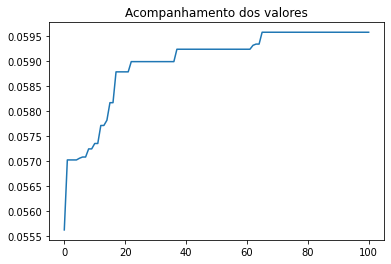

In [ ]:
# Forças aplicadas (kN)
f1 = 0
f2 = 55
f3 = 20
f4 = 40
f5 = 10
f6 = f7 = f8 = f9 = f10 = 0

# Formação das listas
listaNum = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

listaF = [f1, f2, f3, f4, f5, f6, f7, f8, f9, f10]

tam = 200
taxa_mutacao = 0.05
num_geracoes = 100
ag = AG(tam)

ag.resolver(taxa_mutacao, num_geracoes, listaNum, listaF)

plt.plot(ag.lista_solucoes)
plt.title('Acompanhamento dos valores')
plt.show()

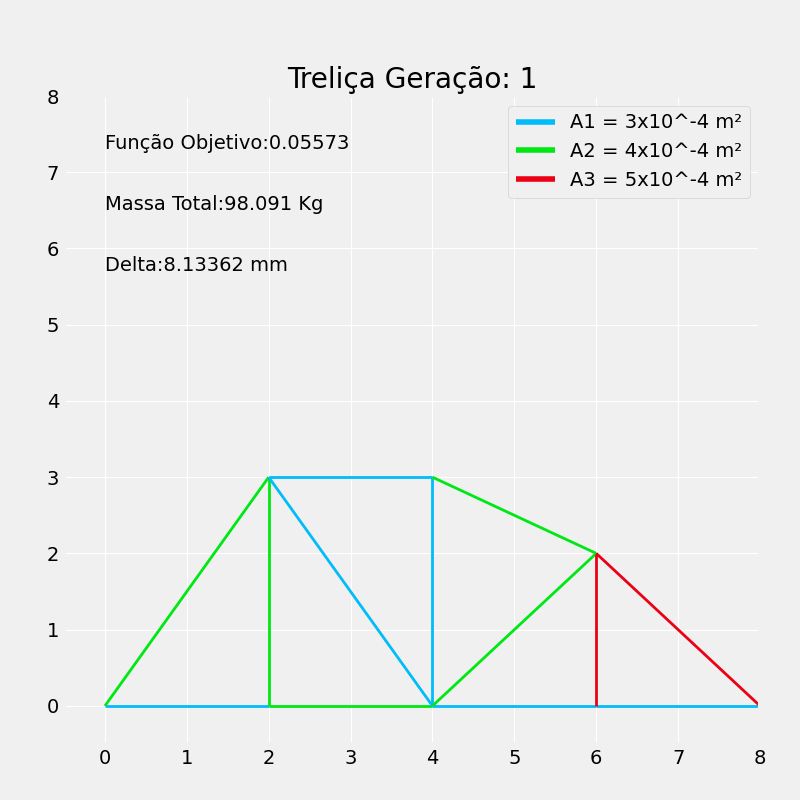